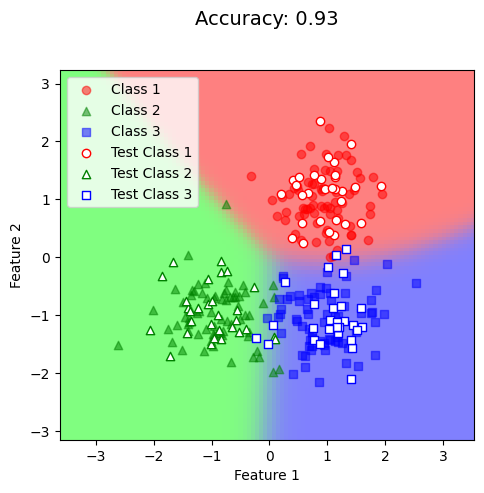

In [1]:
import numpy as np

# 生成三类数据，每类数据有100个样本
np.random.seed(42)
class1 = np.random.randn(100, 2) * 0.5 + np.array([1, 1])
class2 = np.random.randn(100, 2) * 0.5 + np.array([-1, -1])
class3 = np.random.randn(100, 2) * 0.5 + np.array([1, -1])

# 将数据集分为训练集和测试集
X_train = np.concatenate([class1[:70], class2[:70], class3[:70]])
y_train = np.concatenate([np.zeros(70), np.ones(70), 2 * np.ones(70)])
X_test = np.concatenate([class1[70:], class2[70:], class3[70:]])
y_test = np.concatenate([np.zeros(30), np.ones(30), 2 * np.ones(30)])

# 计算每个类别的先验概率
prior_probs = np.zeros(3)
for i in range(3):
    prior_probs[i] = np.sum(y_train == i) / y_train.shape[0]

# 计算每个特征在每个类别中的条件概率
mean_vectors = np.zeros((3, X_train.shape[1]))
std_vectors = np.zeros((3, X_train.shape[1]))
for i in range(3):
    mean_vectors[i] = np.mean(X_train[y_train == i], axis=0)
    std_vectors[i] = np.std(X_train[y_train == i], axis=0)

# 预测测试集的标签
y_pred = np.zeros(y_test.shape[0])
for i, x in enumerate(X_test):
    # 计算x在每个类别下的概率
    probs = np.zeros(3)
    for j in range(3):
        probs[j] = np.prod(1 / (np.sqrt(2 * np.pi) * std_vectors[j]) * np.exp(-(x - mean_vectors[j]) ** 2 / (2 * std_vectors[j] ** 2))) * prior_probs[j]
    y_pred[i] = np.argmax(probs)

# 导入绘图库
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 设置形状和颜色
markers = ['o', '^', 's']
colors = ['red', 'green', 'blue']
cmap = ListedColormap(colors)

# 画出训练集
for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], marker=markers[i], color=colors[i], alpha=0.5, label=f"Class {i+1}")

# 画出测试集
for i in range(3):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], marker=markers[i], color='white', edgecolors=colors[i], label=f"Test Class {i+1}")

# 画出决策边界
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
Z = np.zeros((100, 100, 3))
for i in range(100):
    for j in range(100):
        probs = np.zeros(3)
        for k in range(3):
            probs[k] = np.prod(1 / (np.sqrt(2 * np.pi) * std_vectors[k]) * np.exp(-(np.array([xx1[i, j], xx2[i, j]]) - mean_vectors[k]) ** 2 / (2 * std_vectors[k] ** 2))) * prior_probs[k]
        Z[i, j, :] = probs / np.sum(probs)
plt.imshow(Z, extent=[x1_min, x1_max, x2_min, x2_max], origin='lower', alpha=0.5, cmap=cmap)

# 添加图例和标签
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 计算准确率并显示在图的上方
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
plt.title(f"Accuracy: {accuracy:.2f}", fontsize=14, y=1.1)

# 显示图像
plt.show()